In [1]:
!git clone https://github.com/sagihaider/CE888_2021.git

Cloning into 'CE888_2021'...
remote: Enumerating objects: 136, done.
remote: Counting objects: 100% (136/136), done.
remote: Compressing objects: 100% (118/118), done.
remote: Total 326 (delta 83), reused 30 (delta 17), pack-reused 190
Receiving objects: 100% (326/326), 20.33 MiB | 36.58 MiB/s, done.
Resolving deltas: 100% (153/153), done.


In [2]:
from zipfile import ZipFile
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
import time
import cv2
from random import shuffle

from keras.applications.nasnet import NASNetLarge
from keras.applications.vgg19 import VGG19


from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input, decode_predictions

from keras.layers import Dense, Activation, Flatten
from keras.layers import merge, Input
from keras.models import Model
from keras.utils import np_utils
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score, accuracy_score


In [3]:
file_name = '/content/CE888_2021/Lab_8/data.zip'
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('extracted')

extracted


In [4]:
# Make new base directory
cat_data_dir = '/content/data/cats'
dog_data_dir = '/content/data/dogs'
horse_data_dir = '/content/data/horses'
human_data_dir = '/content/data/Humans'
base_dir = '/content/train_test'
os.mkdir(base_dir)

In [5]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
train_horses_dir = os.path.join(train_dir, 'horses')
train_humans_dir = os.path.join(train_dir, 'humans')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
validation_horses_dir = os.path.join(validation_dir, 'horses')
validation_humans_dir = os.path.join(validation_dir, 'humans')
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')
test_horses_dir = os.path.join(test_dir, 'horses')
test_humans_dir = os.path.join(test_dir, 'humans')

In [6]:
os.mkdir(train_dir)
os.mkdir(validation_dir)
os.mkdir(test_dir)
os.mkdir(train_cats_dir)
os.mkdir(train_dogs_dir)
os.mkdir(train_horses_dir)
os.mkdir(train_humans_dir)
os.mkdir(validation_cats_dir)
os.mkdir(validation_dogs_dir)
os.mkdir(validation_horses_dir)
os.mkdir(validation_humans_dir)
os.mkdir(test_cats_dir)
os.mkdir(test_dogs_dir)
os.mkdir(test_horses_dir)
os.mkdir(test_humans_dir)

In [7]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1,100)]
for fname in fnames:
    src = os.path.join(cat_data_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    #print(src,dst)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(100, 150)]
for fname in fnames:
    src = os.path.join(cat_data_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(150, 200)]
for fname in fnames:
    src = os.path.join(cat_data_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1,100)]
for fname in fnames:
    src = os.path.join(dog_data_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(100, 150)]
for fname in fnames:
    src = os.path.join(dog_data_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(150, 200)]
for fname in fnames:
    src = os.path.join(dog_data_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['horse-{}.jpg'.format(i) for i in range(1,100)]
for fname in fnames:
    src = os.path.join(horse_data_dir, fname)
    fname = fname.replace('-', '.')
    dst = os.path.join(train_horses_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['horse-{}.jpg'.format(i) for i in range(100, 150)]
for fname in fnames:
    src = os.path.join(horse_data_dir, fname)
    fname = fname.replace('-', '.')
    dst = os.path.join(validation_horses_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['horse-{}.jpg'.format(i) for i in range(150, 200)]
for fname in fnames:
    src = os.path.join(horse_data_dir, fname)
    fname = fname.replace('-', '.')
    dst = os.path.join(test_horses_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['rider-{}.jpg'.format(i) for i in range(1,100)]
for fname in fnames:
    src = os.path.join(human_data_dir, fname)
    fname = fname.replace('-', '.')
    dst = os.path.join(train_humans_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['rider-{}.jpg'.format(i) for i in range(100, 150)]
for fname in fnames:
    src = os.path.join(human_data_dir, fname)
    fname = fname.replace('-', '.')
    dst = os.path.join(validation_humans_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['rider-{}.jpg'.format(i) for i in range(150, 200)]
for fname in fnames:
    src = os.path.join(human_data_dir, fname)
    fname = fname.replace('-', '.')
    dst = os.path.join(test_humans_dir, fname)
    shutil.copyfile(src, dst)

In [8]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total training horse images:', len(os.listdir(train_horses_dir)))
print('total training human images:', len(os.listdir(train_humans_dir)))

print('\ntotal validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total validation horse images:', len(os.listdir(validation_horses_dir)))
print('total validation human images:', len(os.listdir(validation_humans_dir)))


print('\ntotal test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))
print('total test horse images:', len(os.listdir(test_horses_dir)))
print('total test human images:', len(os.listdir(test_humans_dir)))

total training cat images: 99
total training dog images: 99
total training horse images: 99
total training human images: 99

total validation cat images: 50
total validation dog images: 50
total validation horse images: 50
total validation human images: 50

total test cat images: 50
total test dog images: 50
total test horse images: 50
total test human images: 50


In [9]:
IMG_SIZE = 224
LR = 1e-4

In [65]:
def label_img(img):
  word_label = img.split('.')[0]
  if word_label == 'dog': return 1
  elif word_label == 'cat': return 0
  elif word_label == 'horse': return 2
  elif word_label == 'rider': return 3

In [29]:
train_dir_list = os.listdir(train_dir)
validation_dir_list = os.listdir(validation_dir)
test_dir_list = os.listdir(test_dir)

In [72]:
def create_data_split(data_dir_list, data_dir):
  x = []
  y = []
  for dataset in data_dir_list:
    img_list = os.listdir(data_dir + '/' + dataset)
    for img in img_list:
      img_path = data_dir + '/' + dataset + '/' + img
      image = cv2.resize(cv2.imread(img_path), (IMG_SIZE, IMG_SIZE))
      image = cv2.normalize(image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

      label = label_img(img)

      x.append(np.array(image))
      y.append(label)
  
  return np.array(x), np.array(y)

In [73]:
train_x, train_y = create_data_split(train_dir_list, train_dir)
val_x, val_y = create_data_split(validation_dir_list, validation_dir)
test_x, test_y = create_data_split(test_dir_list, test_dir)

In [77]:
print(train_x.shape, train_y.shape)
print(val_x.shape, val_y.shape)
print(test_x.shape, test_y.shape)

(396, 224, 224, 3) (396,)
(200, 224, 224, 3) (200,)
(200, 224, 224, 3) (200,)


In [78]:
img_input = Input(shape=(IMG_SIZE, IMG_SIZE, 3))

In [81]:
from tensorflow.keras.applications import VGG16

model = VGG16(
    include_top=True,
    weights="imagenet",
    input_tensor=img_input,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax")
model.summary()

553467904/553467096 [==============================] - 4s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

In [84]:
last_layer = model.get_layer('fc2').output
out = Dense(1, activation='sigmoid', name='output')(last_layer)
model = Model(img_input, out)

for layer in model.layers[:-1]:
  layer.trainable = False

model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [85]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [87]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

my_callbacks = [
    EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True),
    ModelCheckpoint(filepath='vgg16_model.h5', save_best_only=True),
]

In [88]:
history = model.fit(train_x, train_y, batch_size=10, epochs=10, validation_data=(val_x, val_y), callbacks=my_callbacks)

Epoch 1/10
40/40 [==============================] - 307s 8s/step - loss: -6.9277 - accuracy: 0.1975 - val_loss: -28.9666 - val_accuracy: 0.2500
Epoch 2/10
40/40 [==============================] - 309s 8s/step - loss: -33.1832 - accuracy: 0.2395 - val_loss: -57.5747 - val_accuracy: 0.2500
Epoch 3/10
40/40 [==============================] - 306s 8s/step - loss: -51.2609 - accuracy: 0.2395 - val_loss: -89.1573 - val_accuracy: 0.2500
Epoch 4/10
40/40 [==============================] - 315s 8s/step - loss: -86.0157 - accuracy: 0.2506 - val_loss: -120.9834 - val_accuracy: 0.2500
Epoch 5/10
40/40 [==============================] - 307s 8s/step - loss: -122.8402 - accuracy: 0.2686 - val_loss: -152.1228 - val_accuracy: 0.2500
Epoch 6/10
40/40 [==============================] - 315s 8s/step - loss: -167.6586 - accuracy: 0.2642 - val_loss: -183.4199 - val_accuracy: 0.2500
Epoch 7/10
40/40 [==============================] - 306s 8s/step - loss: -192.3589 - accuracy: 0.2264 - val_loss: -214.5990 - 

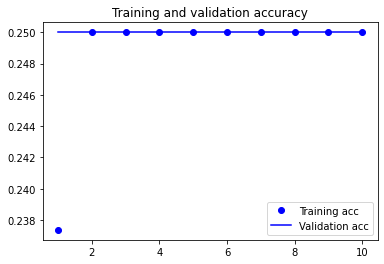

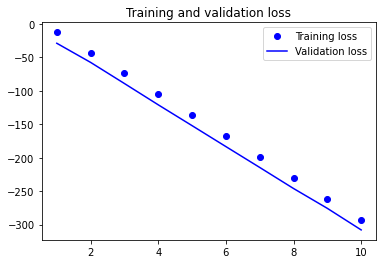

In [91]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [96]:
from sklearn.metrics import accuracy_score

## Test Accuracy
predictions = model.predict(test_x)
ypred = predictions > 0.5
test_acc = accuracy_score(test_y, ypred)

from sklearn.metrics import precision_recall_fscore_support, roc_auc_score

precision, recall, f1score, _ = precision_recall_fscore_support(test_y, ypred, average='weighted')


print("Train Accuracy:\t", acc[-1])
print("Val Accuracy:\t", val_acc[-1])
print("Test Accuracy:\t", test_acc)
print("Precision:\t", precision)
print("Recall:\t\t", recall)
print("F1 Score:\t", f1score)


Train Accuracy:	 0.25
Val Accuracy:	 0.25
Test Accuracy:	 0.25
Precision:	 0.0625
Recall:		 0.25
F1 Score:	 0.1


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
